# Project: 

# Reducing Traffic Mortality in the USA using K-means Clustering Powered by Tableau 

##### How can we find a good stratgey for reducing traffic-related deaths?

## Contents 

**1. Introduction**


**2. Dataset**


**3. Sourcing and loading**


**4. Create a textual and a graphical summary of the data**


**5. Quantify the association of features and accidents**    


**6. Fit a multivariate linear regression**


**7. Perform PCA on standardized data**


**8. Visualize the first two principal components**


**9. Modeliing: K-Means Clustering (Choosing K)** 
   * Elbow Method - Distortion from scipy (Euclidean distance metric is used)
   * Elbow Method - Inertia (inertia_ attribute from kmeans is used)
   * Elbow Method - Sum-of-squares error (SSE) in each cluster against K

    
**10. Visualizing clusters with PCA**


**11. Visualize the feature differences between the clusters**


**12. Extract Information - Clusters**
   * Save our final data For EDA powered by <code>**Tableau**</code>
   * Compute the number of accidents within each cluster


**13. Conclusions**

## 1. Introduction

![car](https://user-images.githubusercontent.com/67468718/108003465-c2010380-6fa7-11eb-8824-ce140d363179.JPG)

While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.

Per request of the US Department of Transportation, we are currently investigating how to derive a strategy to reduce the incidence of road accidents across the nation. By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. **In particular, instead of implementing a costly nation-wide plan we want to focus on groups of states with similar profiles. How can we find such groups in a statistically sound way and communicate the result effectively?**

To accomplish these tasks, we will make use of data wrangling, plotting, PCA (dimensionality reduction, unsupervised clustering (K-means) and Tableau.

## 2. Dataset:

The data given to us was originally collected by the National Highway Traffic Safety Administration and the National Association of Insurance Commissioners in <code>**2011**</code>. This particular dataset can be found in this [Location](https://github.com/fivethirtyeight/data/tree/master/bad-drivers) which was based in this [story](https://fivethirtyeight.com/features/which-state-has-the-worst-drivers/)

## 3. Sourcing and loading

In [1]:
# Import the `pandas` module:
import pandas as pd

# Read in `road-accidents.csv`
car_acc = pd.read_csv('datasets/road-accidents.csv', comment='#', sep='|')

# Save the number of rows columns as a tuple
rows_and_cols = car_acc.shape
print("In the 'car_acc' df there are {} rows and {} columns.\n".format(rows_and_cols[0], rows_and_cols[1]))
print('============================================')
# Generate an overview of the DataFrame
car_acc_information = car_acc.info()
print(car_acc_information)
print('===============================================================================')
# Display the last five rows of the DataFrame
car_acc.tail()

In the 'car_acc' df there are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


## 4. Create a textual and a graphical summary of the data

We now have an idea of what the dataset looks like. To further familiarize ourselves with this data, we will calculate summary statistics and produce a graphical overview of the data. The graphical overview is good to get a sense for the distribution of variables within the data and could consist of one histogram per column. It is often a good idea to also explore the pairwise relationship between all columns in the data set by using a using pairwise scatter plots (sometimes referred to as a "scatterplot matrix").

In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aktha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


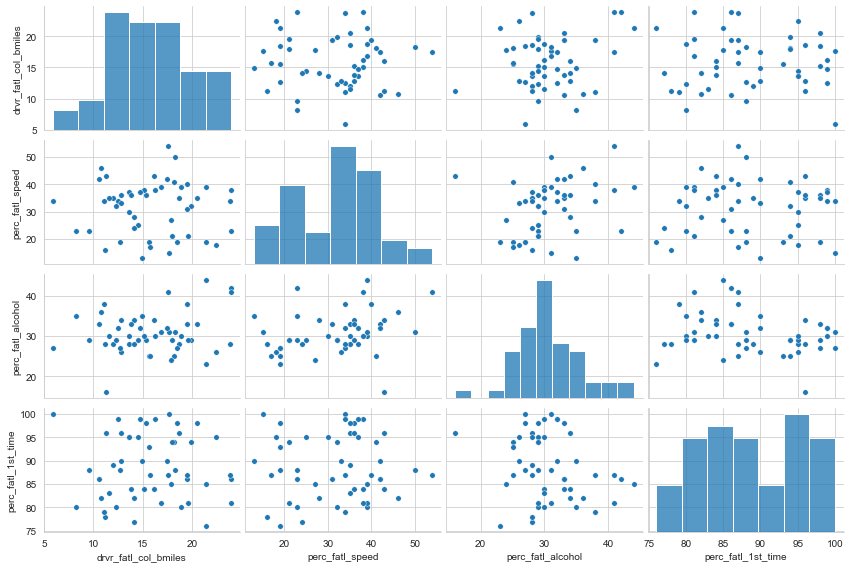

In [2]:
# import seaborn and make plots appear inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = car_acc.describe()
print(sum_stat_car)

# Create a pairwise scatter plot to explore the data
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.pairplot(car_acc, height=2, aspect=1.5, palette="tab10", plot_kws = {"s":30})


## 5. Quantify the association of features and accidents

<p>We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).</p>
<p>To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:</p>
<ul>
<li>0.2 = weak</li>
<li>0.5 = medium</li>
<li>0.8 = strong</li>
<li>0.9 = very strong</li>
</ul>

In [3]:
# Compute the correlation coefficent for all column pairs
corr_columns = car_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


Text(0.5, 1.0, 'Correlation Table')

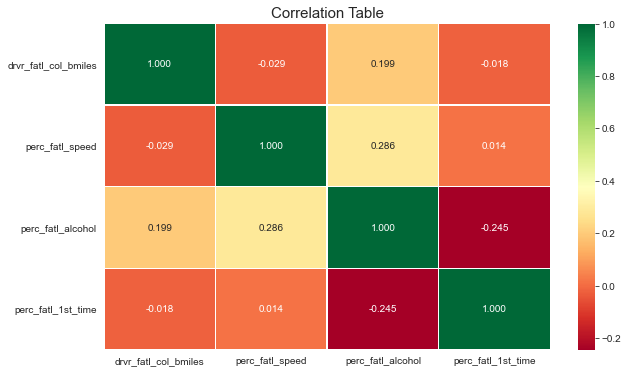

In [4]:
plt.figure(figsize=(10,6)) # ensure that the Matplotlib plot is big enough
sns.heatmap(car_acc.corr(), linewidths=.4, annot=True, fmt=".3f", cmap='RdYlGn')
plt.title('Correlation Table', fontsize=15)

## 6. Fit a multivariate linear regression

From the correlation table, we see that the amount of fatal accidents is most strongly correlated with alcohol consumption (first row). But in addition, we also see that some of the features are correlated with each other, for instance, speeding and alcohol consumption are positively correlated. We, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression.

Both the multivariate regression and the correlation measure how strongly the features are associated with the outcome (fatal accidents). When comparing the regression coefficients with the correlation coefficients, we will see that they are slightly different. The reason for this is that the multiple regression computes the association of a feature with an outcome, given the association with all other features, which is not accounted for when calculating the correlation coefficients.

A particularly interesting case is when the correlation coefficient and the regression coefficient of the same feature have opposite signs. How can this be? For example, when a feature A is positively correlated with the outcome Y but also positively correlated with a different feature B that has a negative effect on Y, then the indirect correlation (A->B->Y) can overwhelm the direct correlation (A->Y). In such a case, the regression coefficient of feature A could be positive, while the correlation coefficient is negative. This is sometimes called a masking relationship. Let’s see if the multivariate regression can reveal such a phenomenon.

In [5]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = car_acc[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target = car_acc.drvr_fatl_col_bmiles

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

## 7. Perform PCA on standardized data

We have learned that alcohol consumption is weakly associated with the number of fatal accidents across states. This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents. But there are also associations between alcohol consumptions and the other two features, so it might be worth trying to split the states in a way that accounts for all three features.

One way of clustering the data is to use PCA to visualize data in reduced dimensional space where we can try to pick up patterns by eye. PCA uses the absolute variance to calculate the overall variance explained for each principal component, so it is important that the features are on a similar scale (unless we would have a particular reason that one feature should be weighted more).

We'll use the appropriate scaling function to standardize the features to be centered with mean 0 and scaled with standard deviation 1.

The cumulative variance of the first two principal components is 0.7947


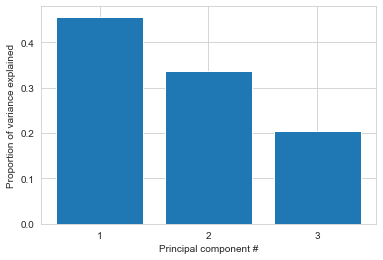

In [6]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

## 8. Visualize the first two principal components

The first two principal components enable visualization of the data in two dimensions while capturing a high proportion of the variation (79%) from all three features: speeding, alcohol influence, and first-time accidents. This enables us to use our eyes to try to discern patterns in the data with the goal to find groups of similar states. Although clustering algorithms are becoming increasingly efficient, human pattern recognition is an easily accessible and very efficient method of assessing patterns in data.

We will create a scatter plot of the first principle components and explore how the states cluster together in this visualization.

Text(0.5, 1.0, '2-Dimensional PCA components')

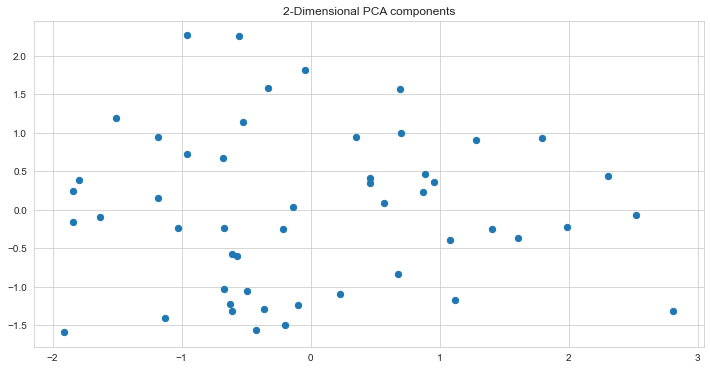

In [7]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.subplots(figsize=(12, 6))
plt.scatter(p_comp1, p_comp2, s=40, marker='o')
plt.grid(True)
plt.title("2-Dimensional PCA components")

## 9. Modeliing: K-Means Clustering (Choosing K)

Recall that in K-Means Clustering we want to maximize the distance between centroids and minimize the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing $K$: The Elbow Method

The Elbow Method is one of the most popular methods to determine this optimal value of k.

From the above visualization, we can see that the optimal number of clusters should be between 3-5. But visualizing the data alone cannot always give the right answer. Hence we demonstrate the following steps.

Now, let's define the following:-

 * **Distortion:** It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, **the Euclidean distance metric is used.**
 * **Inertia:** it will be calaculated in two methods:
   * It is the sum of squared distances of samples to their closest cluster center. Typically, **inertia_ attribute from kmeans is used.**
   * Lastly, we look at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 


Let's now iterate the values of k from 2 to 10 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range:

In [8]:
# let's import all the necessary libraries:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np

# Now. let's Initilize distortions, inertias, mapping1 and mapping2:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

#Initilize our clusters ranges:
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=8).fit(p_comps)
    kmeanModel.fit(p_comps)
 
    distortions.append(sum(np.min(cdist(p_comps, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / p_comps.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(p_comps, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / p_comps.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\aktha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\aktha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


### 9.1 Elbow Method - Distortion from scipy (Euclidean distance metric is used)

1 : 1.426266413989856
2 : 1.0551297266822084
3 : 0.8313471311123696
4 : 0.6939376803530304
5 : 0.5967033162798505
6 : 0.54404290575774
7 : 0.49653940949923187
8 : 0.4616869791681456
9 : 0.41528751031504757


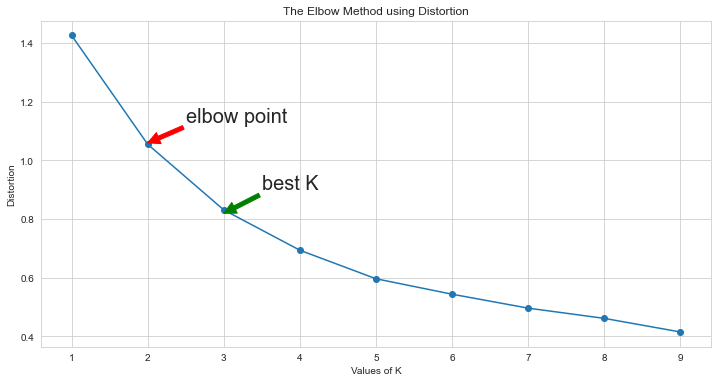

In [9]:
# let's iterate over mapping1 to get the avg verage of the squared distances from the cluster centers:
for key, val in mapping1.items():
    print(f'{key} : {val}')
    
# let's visualize elbow point and best K:
plt.subplots(figsize=(12, 6))    
plt.plot(K, distortions, marker='o')
plt.annotate('elbow point', xy=(2, 1.06), xytext=(2.5, 1.13), arrowprops={'color':'red'}, fontsize=20)
plt.annotate('best K', xy=(3, 0.82), xytext=(3.5, 0.9), arrowprops={'color':'green'}, fontsize=20)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid(True)
plt.show()

**Elbow Method using Distortion from Scipy** confirms that the <code>**elbow point k=2**</code> so the <code>**best k will be=3**</code> (plot starts descending much more slowly after k=3)

#### 9.2 Elbow Method - Inertia (inertia_ attribute from kmeans is used)

1 : 121.58877270400383
2 : 71.10530673336486
3 : 41.781419924919874
4 : 30.862273673363227
5 : 22.79292612394595
6 : 19.355711908895326
7 : 16.564491751951127
8 : 13.68335795679619
9 : 11.55996576011239


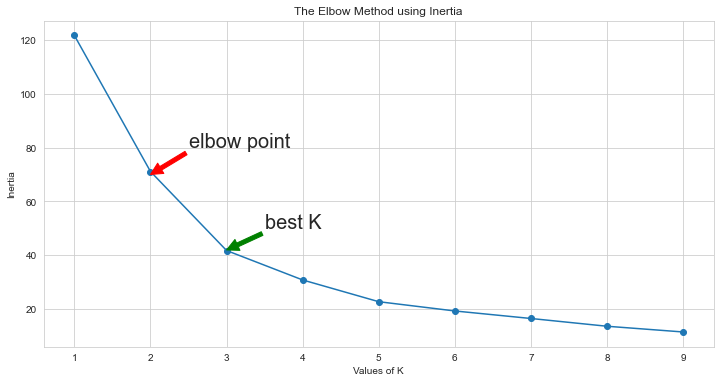

In [10]:
# let's iterate over mapping2 to get the sum of squared distances of samples to their closest cluster center (inertia)
for key, val in mapping2.items():
    print(f'{key} : {val}')

# let's visualize elbow point and best K:
plt.subplots(figsize=(12, 6)) 
plt.plot(K, inertias, marker='o')
plt.annotate('elbow point', xy=(2, 70), xytext=(2.5, 80), arrowprops={'color':'red'}, fontsize=20)
plt.annotate('best K', xy=(3, 42), xytext=(3.5, 50), arrowprops={'color':'green'}, fontsize=20)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid(True)
plt.show()  

**Elbow Method using Inertia from kmeans** confirms that the <code>**elbow point k=2**</code> so the <code>**best k will be=3**</code> (plot starts descending much more slowly after k=3)

#### 9.3 Elbow Method - Sum-of-squares error (SSE) in each cluster against K

C:\Users\aktha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


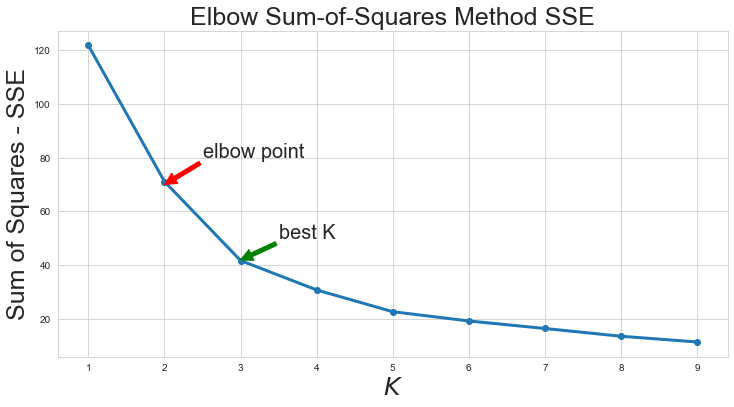

In [11]:
# let's import all the necessary libraries:
from sklearn.cluster import KMeans
import numpy as np

# Make an empty list
ss = []

# Make an empty dictionary called assignments 
assignments = {}

# Make a variable called Krange, and assign it a list of range(1, 10)
Krange  = list(range(1, 10))

# We now want to iterate through this list to construct a plot showing SS for each K. Name the iterator variable K 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    model = KMeans(n_clusters=K, random_state=8)
    assigned_cluster = model.fit_predict(p_comps)
    centers = model.cluster_centers_
    ss.append(np.sum((p_comps - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster
    
# Call plot() on plt with parameters Krange and ss
plt.subplots(figsize=(12, 6))
plt.plot(Krange, ss, marker='o', linewidth=3)

# Let's label the plot 
plt.annotate('elbow point', xy=(2, 70), xytext=(2.5, 80), arrowprops={'color':'red'}, fontsize=20)
plt.annotate('best K', xy=(3, 42), xytext=(3.5, 50), arrowprops={'color':'green'}, fontsize=20)
plt.title('Elbow Sum-of-Squares Method SSE', fontsize=25)
plt.xlabel("$K$", fontsize=25)
plt.ylabel("Sum of Squares - SSE", fontsize=25)
plt.grid(True)

**Elbow Method by calculating sum-of-squares error in each cluster against  𝐾 is similar when calculating .inertia from Kmeans** confirms that the <code>**elbow point k=2**</code> so the <code>**best k will be=3**</code> (plot starts descending much more slowly after k=3)

3


([<matplotlib.axis.XTick at 0x1f8d6f6d108>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

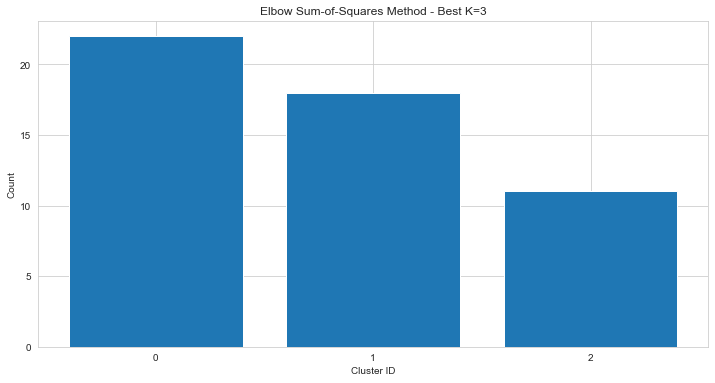

In [12]:
# What is the best K? Fill in the assignment below appropriately
best_K = 3
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

# Call bar() on plt, with parameters range(best_K), counts, and align = 'center'
plt.subplots(figsize=(12, 6))
plt.bar(range(best_K), counts, align = 'center')

# Label the axes 
plt.title("Elbow Sum-of-Squares Method - Best K=3")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.grid(True)
plt.xticks(range(best_K))

## 10. Visualizing Clusters using PCA

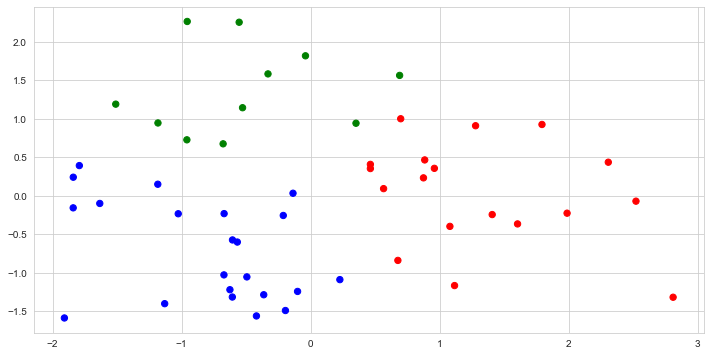

In [23]:
# Let's import matplotlib.colors:
import matplotlib.colors

# Make a variable called model. We want n_clusters =3:
model = KMeans(n_clusters=3, random_state=8)

# Fit the data to the `km` object
model.fit(features_scaled)

cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])
plt.subplots(figsize=(12, 6))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c=model.labels_, s=40, cmap=cmap)
plt.grid(True)

## 11. Visualize the feature differences between the clusters

Thus far, we have used both our visual interpretation of the data and the KMeans clustering algorithm to reveal patterns in the data, but what do these patterns mean?

Remember that the information we have used to cluster the states into three distinct groups are the percentage of drivers speeding, under alcohol influence and that has not previously been involved in an accident. We used these clusters to visualize how the states group together when considering the first two principal components. This is good for us to understand structure in the data, but not always easy to understand, especially not if the findings are to be communicated to a non-specialist audience.

A reasonable next step in our analysis is to explore how the three clusters are different in terms of the three features that we used for clustering. Instead of using the scaled features, we return to using the unscaled features to help us interpret the differences.

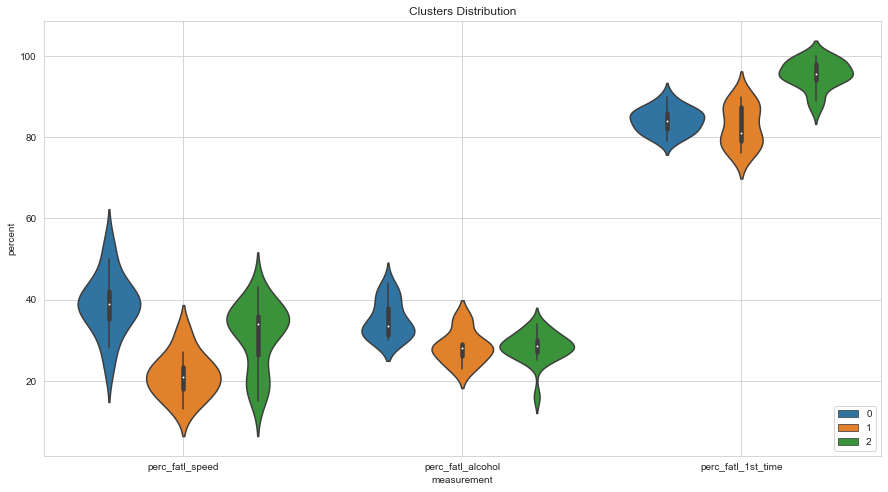

In [29]:
# Create a new column with the labels from the KMeans clustering
car_acc['cluster'] = model.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars='cluster', var_name='measurement', value_name='percent',
                   value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])

# Create a violin plot splitting and coloring the results according to the km-clusters
plt.subplots(figsize=(15, 8))
sns.violinplot(x='measurement', y='percent', data=melt_car, hue='cluster')
plt.legend(loc='lower right')
plt.title('Clusters Distribution')
plt.grid(True)

## 12. Extract Information - Clusters

In [17]:
# Create a new column with the labels from the KMeans clustering
car_acc['cluster'] = model.labels_
car_acc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
0,Alabama,18.8,39,30,80,0
1,Alaska,18.1,41,25,94,2
2,Arizona,18.6,35,28,96,2
3,Arkansas,22.4,18,26,95,2
4,California,12.0,35,28,89,2


In [18]:
# Read in the `miles-drives.csv`
miles_driven = pd.read_csv('datasets/miles-driven.csv', sep='|')
miles_driven.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [19]:
# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
df = car_acc.merge(miles_driven, on='state')
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually
0,Alabama,18.8,39,30,80,0,64914
1,Alaska,18.1,41,25,94,2,4593
2,Arizona,18.6,35,28,96,2,59575
3,Arkansas,22.4,18,26,95,2,32953
4,California,12.0,35,28,89,2,320784


#### Compute the number of accidents within each cluster

Now it is clear that different groups of states may require different interventions. Since resources and time are limited, it is useful to start off with an intervention in one of the three groups first. Which group would this be? To determine this, we will include data on how many miles are driven in each state, because this will help us to compute the total number of fatal accidents in each state. Data on miles driven is available in another tab-delimited text file. We will assign this new information to a column in the DataFrame and create a violin plot for how many total fatal traffic accidents there are within each state cluster.

In [20]:
# Create a new column for the number of drivers involved in fatal accidents
df['num_drvr_fatl_col'] = df['drvr_fatl_col_bmiles'] * df['million_miles_annually'] / 1000
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alabama,18.8,39,30,80,0,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,2,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080


### 12.1 Save our final data For EDA powered by <code>**Tableau**</code>

In [21]:
#let's save the data so we review and analyze using Tableau to see if we can get any insights:
df.to_csv(path_or_buf = 'C:/Users/aktha/Desktop/Future/GOALLLLL/Reducing Traffic Mortality in the USA' + "/kmeans_3_8_final.csv", index=False)

### 12.2 Compute the number of accidents within each cluster

,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


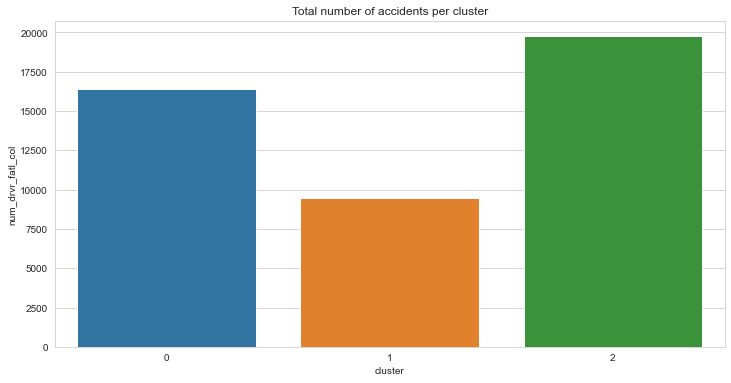

In [22]:
# Create a barplot of the total number of accidents per cluster
plt.subplots(figsize=(12, 6))
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=df, estimator=sum, ci=None)
plt.title('Total number of accidents per cluster')

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = df.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum

## 13. Conclusion

##### Which cluster do you think should be a focus for policy intervention and further investigation?

  * Drivers Behavior – Unsupervised Machine Learning K-means Clustering (K=3)
      * **“State Group 1”**
Represents Drivers who had the greatest number of fatal collisions per billion miles of travel while speeding and under the influence of alcohol. Also, those drivers were the 2nd most involved in fatal accidents more than once. 
Alcohol (Montana, North Dakota, South Carolina and Hawaii), speeding (Hawaii and Pennsylvania), fatal accidents > 1 (Alabama, S/N Carolina and Ohi0)
      * **“State Group 2”** 
Represents Drivers who had the least number of fatal collisions per billion miles of travel. Also, those drivers were the 1st most drivers involved in fatal accidents more than once. 
fatal accidents > 1 (Kentucky 24% worst in the US) 
      * **“State Group 3”** 
Represents Drivers who had the 2nd number of fatal collisions per billion miles of travel mostly while speeding. Also, those drivers were the least drivers involved in fatal accidents more than once. 
Alcohol (Louisiana), speeding (Alaska), fatal accidents > 1 (West Virginia)
      * **“State Group 1”** should be the top priority of the authority to start implementing more strict safety measures that will make our roads and highways safer.
      
  * It is critical that the nation adopt traffic safety improvements that will make our roads and highways safer by focusing on below states:


|Rank|Alcohol|Speeding|Fatal Accidents >1|
|:---:|:-------:|:-------:|:-------:|
|1|Montana|Montana|Kentucky|
|2|North Dakota|South Carolina| South Carolina|
|3|South Carolina|Hawaii| Montana|
|4|Hawaii|Pennsylvania||
|5|Louisiana|Alaska||
|6||Louisiana||
|7||West Virginia||
     


![fatalities](https://user-images.githubusercontent.com/67468718/108629514-162b3e00-7415-11eb-9cfe-dfcb26ed4efb.png)
![segmentation](https://user-images.githubusercontent.com/67468718/108629515-16c3d480-7415-11eb-886e-4e8f99617f71.png)